In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=pd.read_csv(r"C:\Users\Sonali\Desktop\Flip Robo internship\Practice Projects\Project Datasets\Bank Marketing - termdeposit_train-3rd phase.csv")
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
x['type']='train'

In [4]:
y=pd.read_csv(r"C:\Users\Sonali\Desktop\Flip Robo internship\Practice Projects\Project Datasets\Bank Marketing- termdeposit_test-3rd phase.csv")
y

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
y['type']='test'

In [6]:
df=pd.concat([x,y])
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,type
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no,train
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no,train
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no,train
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,train
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,NaN,test
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,NaN,test
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,NaN,test
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,NaN,test


In [7]:
df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,type
10994,31502,24,blue-collar,married,secondary,no,-220,yes,no,cellular,2,apr,90,1,-1,0,unknown,no,train


In [8]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed', 'type'],
      dtype='object')

In [9]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
type          object
dtype: object

In [10]:
df.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
type              0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['subscribed']=le.fit_transform(df['subscribed'])

In [13]:
df['job']=le.fit_transform(df['job'])

In [14]:
df['marital']=le.fit_transform(df['marital'])

In [15]:
df['education']=le.fit_transform(df['education'])

In [16]:
df['default']=le.fit_transform(df['default'])

In [17]:
df['housing']=le.fit_transform(df['housing'])

In [18]:
df['loan']=le.fit_transform(df['loan'])

In [19]:
df['contact']=le.fit_transform(df['contact'])

In [20]:
df['month']=le.fit_transform(df['month'])

In [21]:
df['poutcome']=le.fit_transform(df['poutcome'])

In [22]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,type
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0,train
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0,train
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0,train
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1,train
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3,2,test
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3,2,test
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3,2,test
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2,2,test


In [23]:
df.drop(columns=['type'],inplace=True)

In [24]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          45211 non-null  int64
 1   age         45211 non-null  int64
 2   job         45211 non-null  int32
 3   marital     45211 non-null  int32
 4   education   45211 non-null  int32
 5   default     45211 non-null  int32
 6   balance     45211 non-null  int64
 7   housing     45211 non-null  int32
 8   loan        45211 non-null  int32
 9   contact     45211 non-null  int32
 10  day         45211 non-null  int64
 11  month       45211 non-null  int32
 12  duration    45211 non-null  int64
 13  campaign    45211 non-null  int64
 14  pdays       45211 non-null  int64
 15  previous    45211 non-null  int64
 16  poutcome    45211 non-null  int32
 17  subscribed  45211 non-null  int32
dtypes: int32(10), int64(8)
memory usage: 4.8 MB


<AxesSubplot:>

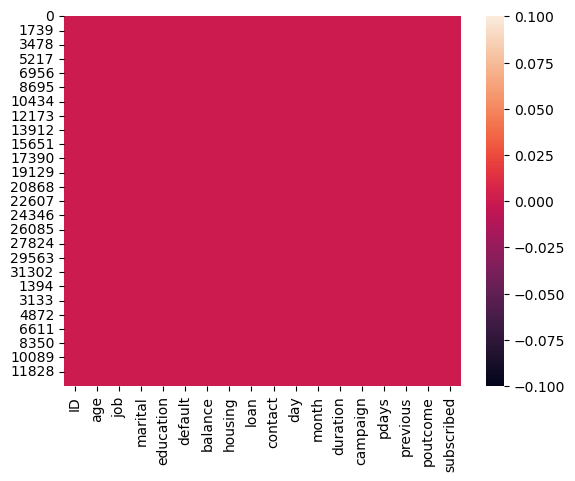

In [26]:
sns.heatmap(df.isnull())

As from the above heatmap, we can see that there are no null values present in the data.

In [27]:
df.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.682201
std,13051.435847,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.903799
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22606.000000,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33908.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,2.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,2.000000


From the above description, we can see that therese is some difference in mean and median, which means that the sckewness is present in the data.

we can also see the large difference between max and 75% values, which shows the presence of outliers.

Description also gives us the values of standard deviation, min and count.

<AxesSubplot:>

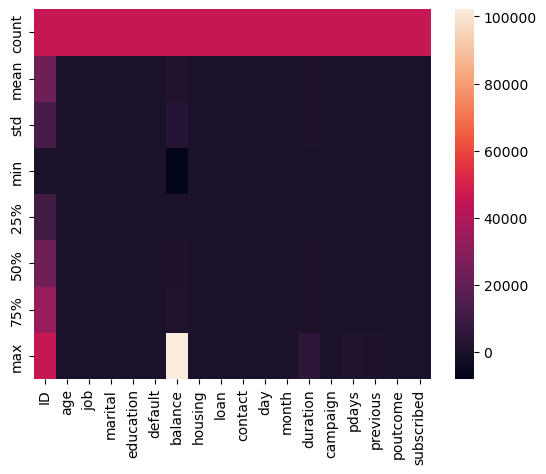

In [28]:
sns.heatmap(df.describe())

In [29]:
df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.014973,0.063002,0.081781,0.094658,-0.053098,0.073639,-0.176143,-0.084240,-0.722366,-0.061465,-0.162055,0.013031,-0.102884,0.437729,0.271098,-0.445365,0.078791
age,0.014973,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.003232
job,0.063002,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.012748
marital,0.081781,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.012669
education,0.094658,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.016101
default,-0.053098,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.010116
balance,0.073639,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.011823
housing,-0.176143,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.034563
loan,-0.084240,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.025677
contact,-0.722366,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.044616


<AxesSubplot:>

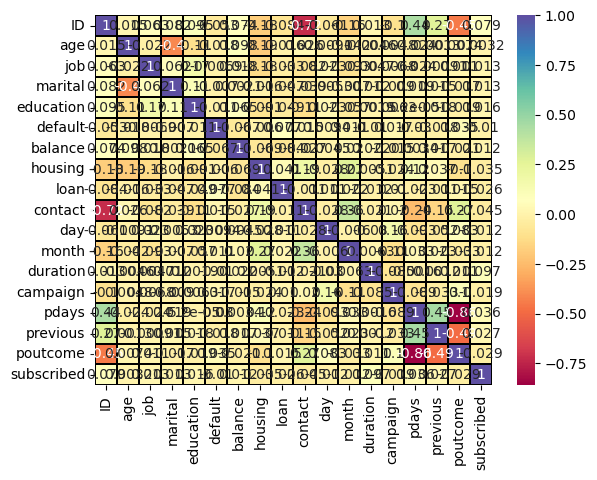

In [30]:
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',cmap='Spectral')

we can see from the above heatmap that almost all the features are positively correlated with each other.

(array([4521., 4521., 4521., 4521., 4521., 4521., 4521., 4521., 4521.,
        4522.]),
 array([1.0000e+00, 4.5220e+03, 9.0430e+03, 1.3564e+04, 1.8085e+04,
        2.2606e+04, 2.7127e+04, 3.1648e+04, 3.6169e+04, 4.0690e+04,
        4.5211e+04]),
 <BarContainer object of 10 artists>)

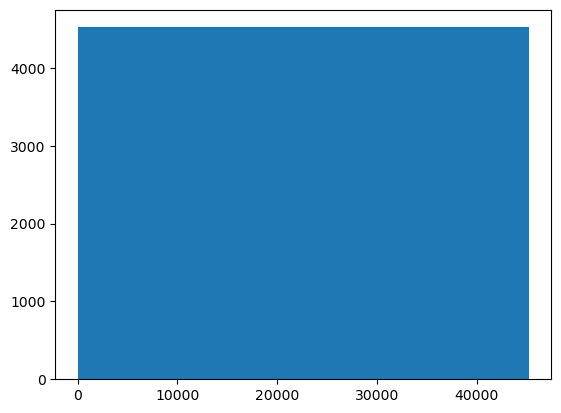

In [31]:
plt.hist(df['ID'])

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

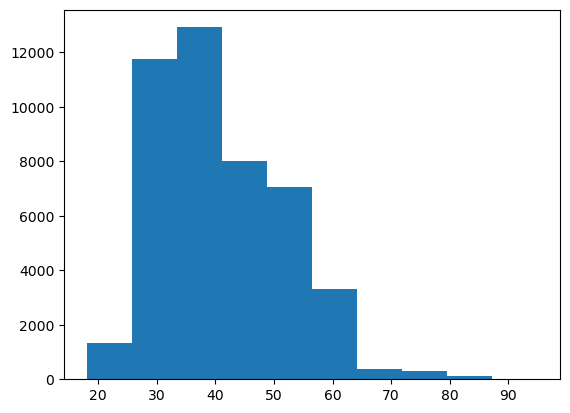

In [32]:
plt.hist(df['age'])

(array([14903.,  1487.,  1240.,  9458.,  2264.,  1579.,  4154.,   938.,
         7597.,  1591.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

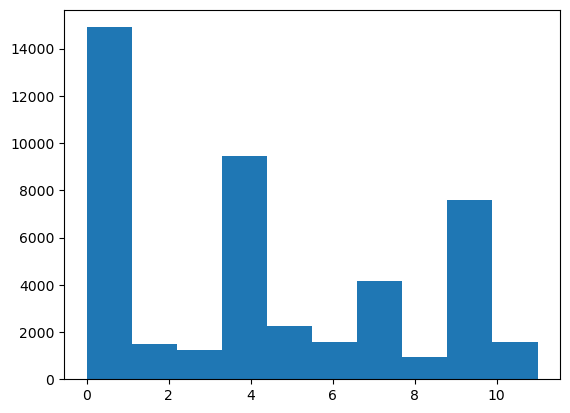

In [33]:
plt.hist(df['job'])

(array([ 5207.,     0.,     0.,     0.,     0., 27214.,     0.,     0.,
            0., 12790.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

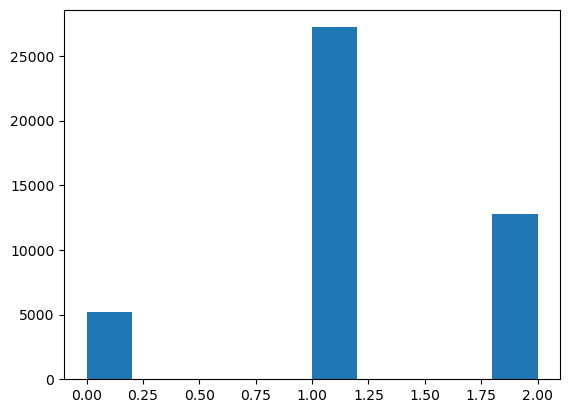

In [34]:
plt.hist(df['marital'])

(array([ 6851.,     0.,     0., 23202.,     0.,     0., 13301.,     0.,
            0.,  1857.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

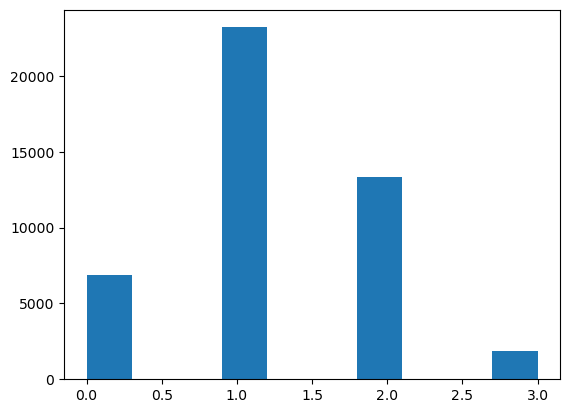

In [35]:
plt.hist(df['education'])

(array([44396.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   815.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

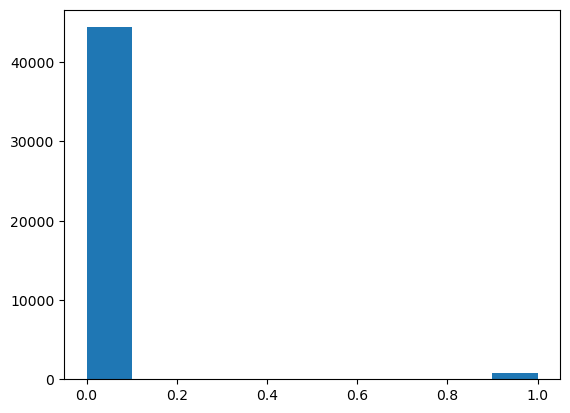

In [36]:
plt.hist(df['default'])

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

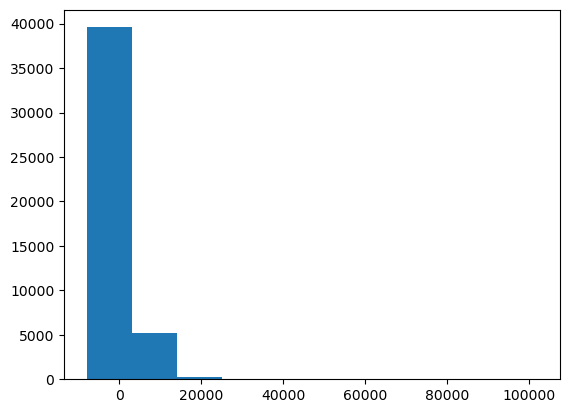

In [37]:
plt.hist(df['balance'])

(array([20081.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25130.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

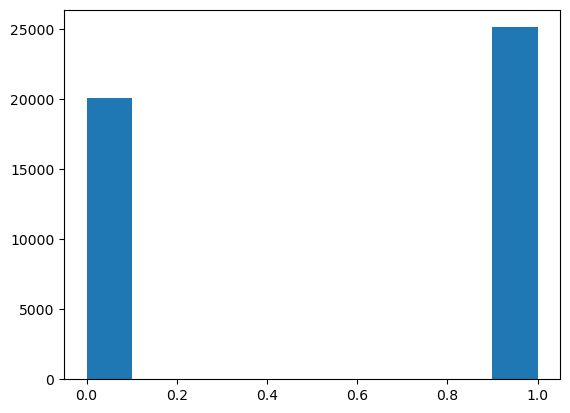

In [38]:
plt.hist(df['housing'])

(array([37967.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7244.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

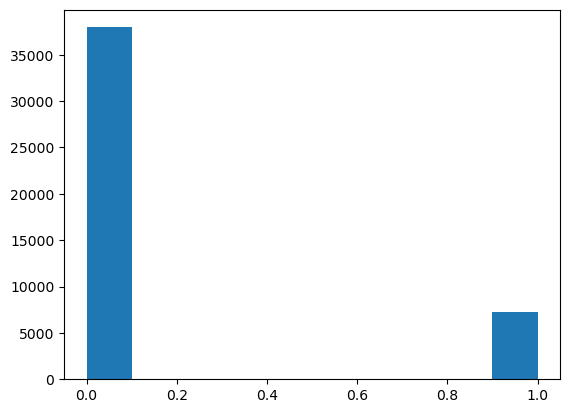

In [39]:
plt.hist(df['loan'])

(array([29285.,     0.,     0.,     0.,     0.,  2906.,     0.,     0.,
            0., 13020.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

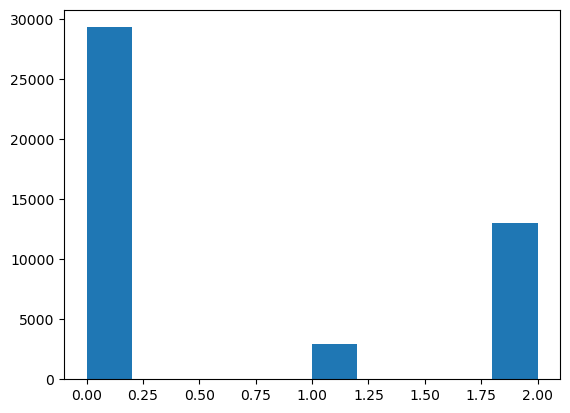

In [40]:
plt.hist(df['contact'])

(array([2694., 5287., 5220., 3606., 5136., 5662., 6535., 2291., 2996.,
        5784.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

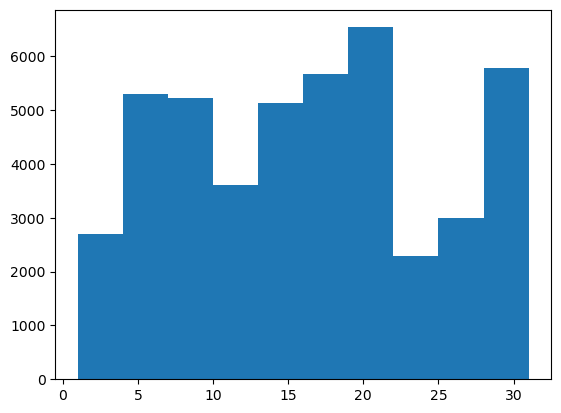

In [41]:
plt.hist(df['day'])

We can see from the above plots, that many features are not normally distibuted.

In [42]:
df.skew()

ID             0.000000
age            0.684818
job            0.261755
marital       -0.102826
education      0.197275
default        7.245375
balance        8.360308
housing       -0.224766
loan           1.852617
contact        0.769381
day            0.093079
month         -0.480272
duration       3.144318
campaign       4.898650
pdays          2.615715
previous      41.846454
poutcome      -1.973561
subscribed     0.667909
dtype: float64

In [43]:
from scipy.stats import boxcox

In [44]:
df['default']=np.sqrt(df['default'])

In [45]:
df['balance']=np.sqrt(df['balance'])

In [46]:
df['balance']=np.cbrt(df['balance'])

In [47]:
df['duration']=np.sqrt(df['duration'])

In [48]:
df['duration']=np.cbrt(df['duration'])

In [49]:
df['loan']=np.cbrt(df['loan'])

In [50]:
df['campaign']=np.sqrt(df['campaign'])

In [51]:
df['campaign']=np.cbrt(df['campaign'])

In [52]:
df['pdays']=np.cbrt(df['pdays'])

In [53]:
df['campaign']=np.cbrt(df['campaign'])

In [54]:
df['loan']=np.sqrt(df['loan'])

In [55]:
df['default']=np.sqrt(df['default'])

In [56]:
df['previous']=np.sqrt(df['previous'])

In [57]:
df['previous']=np.cbrt(df['previous'])

In [58]:
df['previous']=np.sqrt(df['previous'])

In [59]:
df.skew()

ID            0.000000
age           0.684818
job           0.261755
marital      -0.102826
education     0.197275
default       7.245375
balance      -0.848959
housing      -0.224766
loan          1.852617
contact       0.769381
day           0.093079
month        -0.480272
duration      0.081531
campaign      0.984337
pdays         1.761872
previous      1.662963
poutcome     -1.973561
subscribed    0.667909
dtype: float64

by using cbrt and sqrt methods we have tried to normalised the dkewness of the data. we have not used log n boxcox method here, as it was giving the NaN values.

No we will try to find out the outliers present in the data.

<AxesSubplot:>

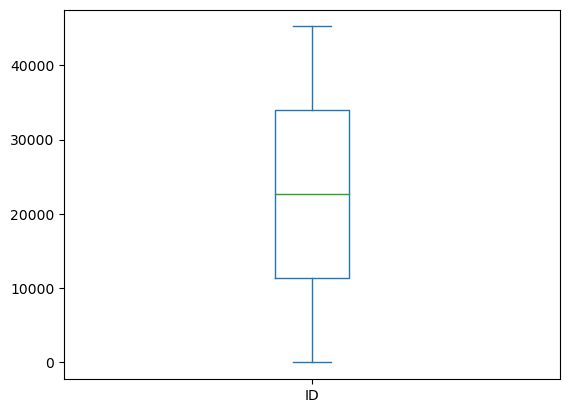

In [60]:
df['ID'].plot.box()

<AxesSubplot:>

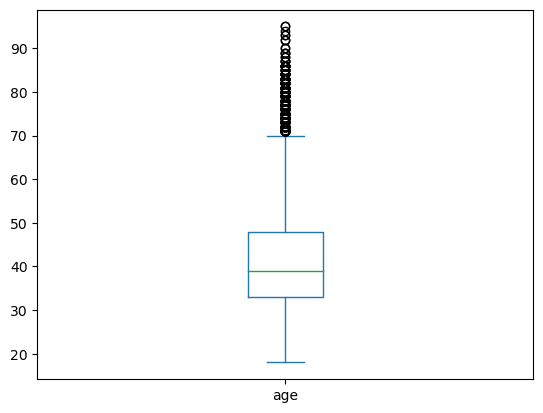

In [61]:
df['age'].plot.box()

<AxesSubplot:>

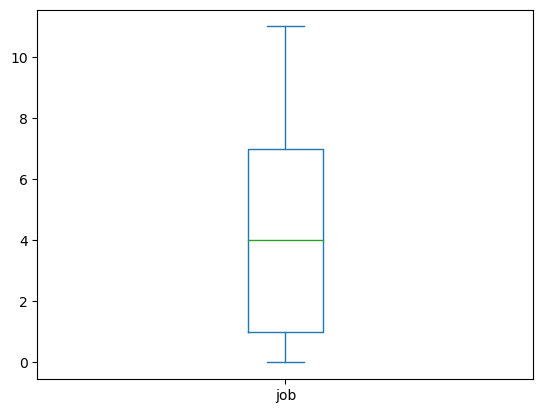

In [62]:
df['job'].plot.box()

<AxesSubplot:>

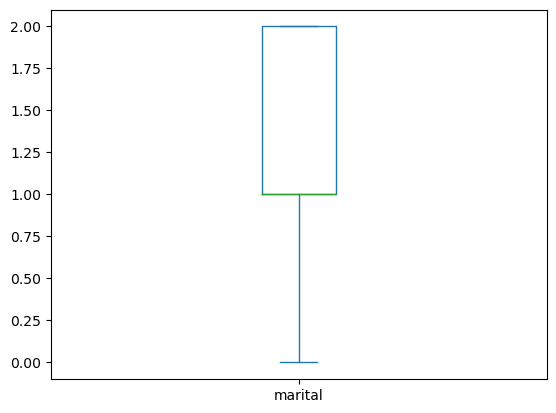

In [63]:
df['marital'].plot.box()

<AxesSubplot:>

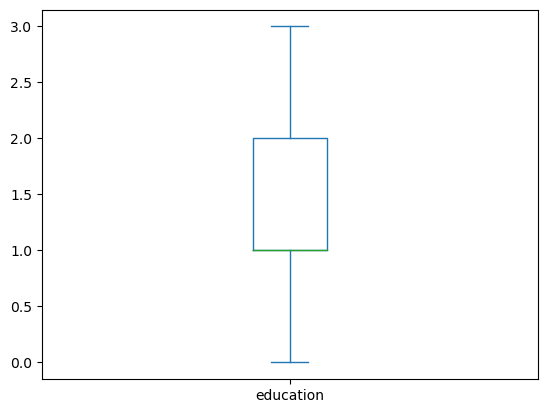

In [64]:
df['education'].plot.box()

<AxesSubplot:>

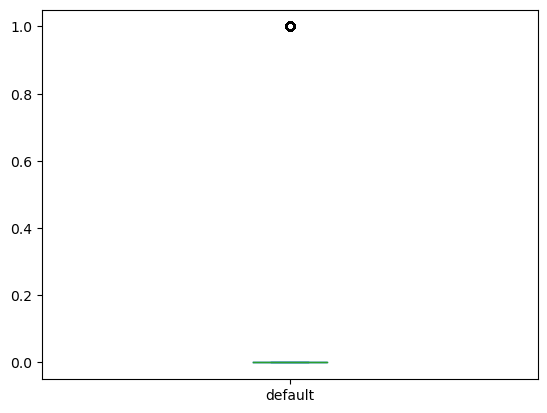

In [65]:
df['default'].plot.box()

<AxesSubplot:>

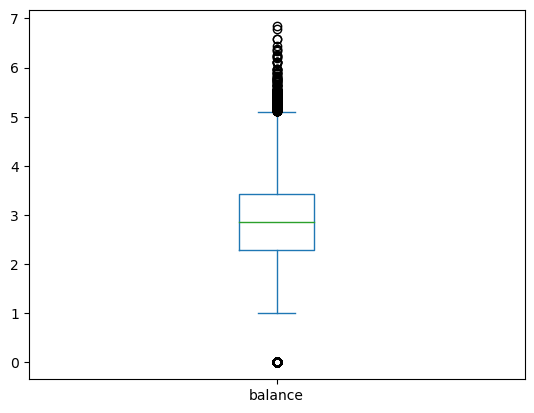

In [66]:
df['balance'].plot.box()

<AxesSubplot:>

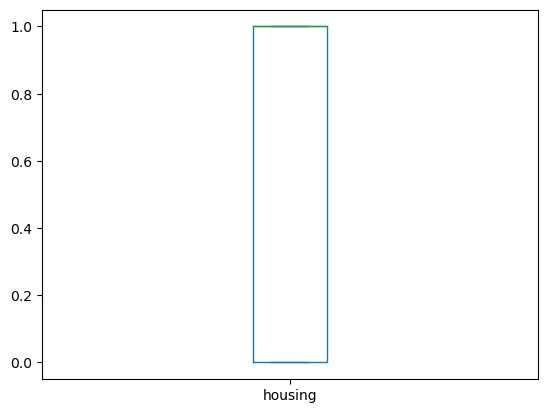

In [67]:
df['housing'].plot.box()

<AxesSubplot:>

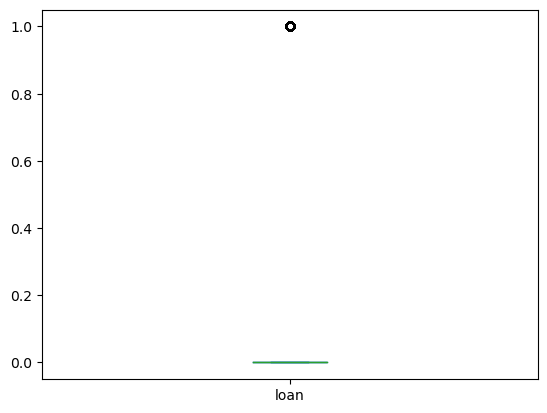

In [68]:
df['loan'].plot.box()

<AxesSubplot:>

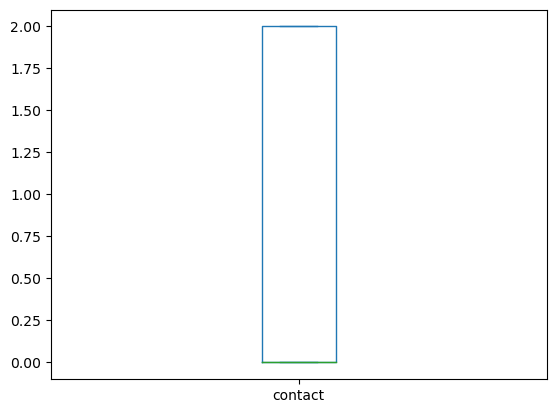

In [69]:
df['contact'].plot.box()

<AxesSubplot:>

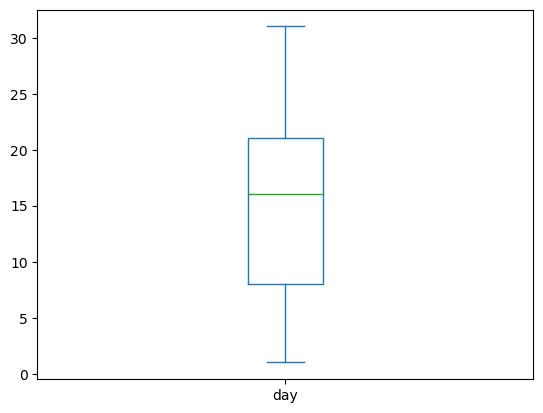

In [70]:
df['day'].plot.box()

<AxesSubplot:>

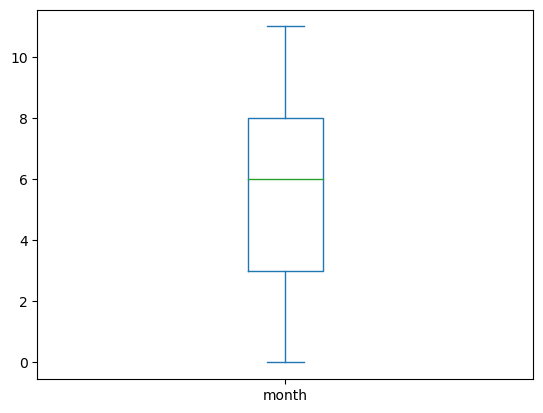

In [71]:
df['month'].plot.box()

<AxesSubplot:>

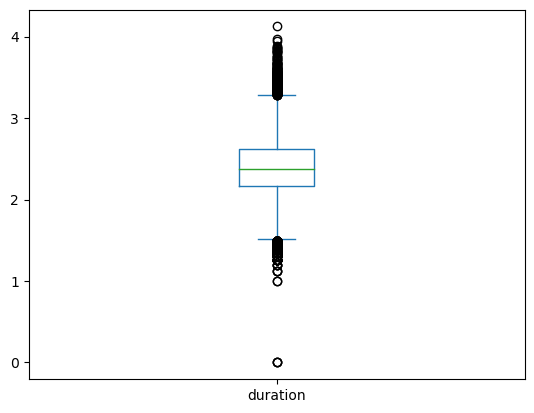

In [72]:
df['duration'].plot.box()

<AxesSubplot:>

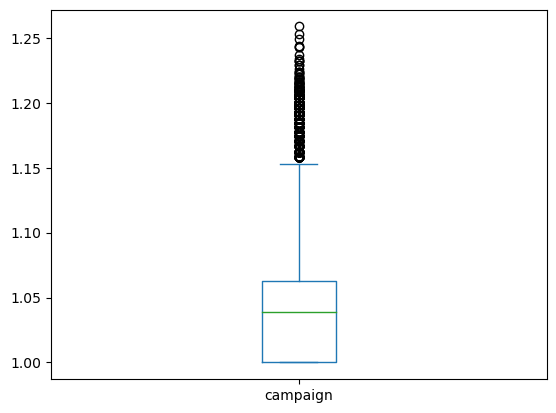

In [73]:
df['campaign'].plot.box()

<AxesSubplot:>

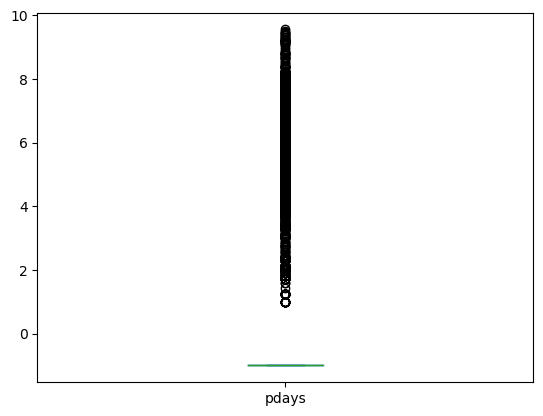

In [74]:
df['pdays'].plot.box()

<AxesSubplot:>

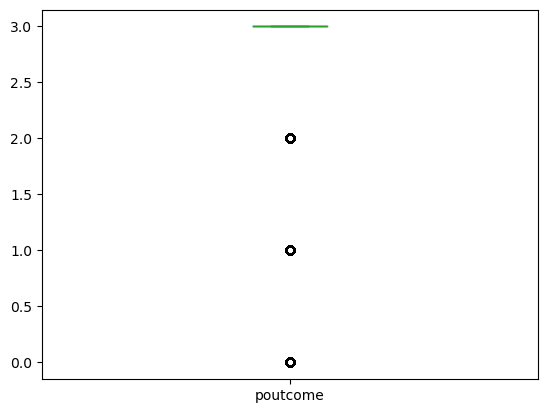

In [75]:
df['poutcome'].plot.box()

Except few features, all the others features are showing the presence of outliers in the data with the help of above bxplots.

In [76]:
from scipy.stats import zscore

In [77]:
df_zscore = (df - df.mean())/df.std()
df_zscore

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.268476,1.418601,-1.326067,-0.275759,2.373253,-0.135488,0.718313,-1.118662,-0.436799,0.400643,0.383730,1.156331,-1.416520,-0.038491,-0.464486,-0.471506,0.444893,-0.754816
1,1.376860,-0.935722,2.035116,-0.275759,-0.300553,-0.135488,-1.363976,-1.118662,-0.436799,-0.713004,0.503886,-0.173937,-0.748726,-0.038491,-0.464486,-0.471506,0.444893,-0.754816
2,-0.558253,-1.312414,0.812868,-0.275759,-0.300553,-0.135488,0.336102,0.893906,-0.436799,-0.713004,0.263573,-0.173937,0.278302,-0.975053,-0.464486,-0.471506,0.444893,-0.754816
3,1.636295,1.512774,-0.103819,-1.919874,1.036350,-0.135488,1.010317,-1.118662,-0.436799,-0.713004,0.744199,0.158630,1.920960,-0.975053,1.528662,2.165711,-0.566169,0.351626
4,0.554422,-0.935722,1.423992,-0.275759,-0.300553,-0.135488,-0.454624,0.893906,-0.436799,-0.713004,-1.418619,-0.839072,0.826058,-0.975053,-0.464486,-0.471506,0.444893,-0.754816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.065817,-0.182339,-0.103819,-0.275759,1.036350,-0.135488,-0.751374,-1.118662,-0.436799,-0.713004,1.465139,-1.504206,-0.254403,0.934839,-0.464486,-0.471506,0.444893,1.458067
13560,-0.832322,1.230255,-1.020505,-0.275759,-1.637455,-0.135488,0.806607,0.893906,-0.436799,1.514289,0.503886,0.158630,-0.184840,-0.975053,-0.464486,-0.471506,0.444893,1.458067
13561,0.435661,-0.559030,0.201744,-0.275759,-1.637455,-0.135488,-0.143863,0.893906,-0.436799,-0.713004,1.585295,-0.506505,-0.343249,-0.975053,-0.464486,-0.471506,0.444893,1.458067
13562,1.728316,-1.124068,-1.326067,1.368357,-0.300553,-0.135488,0.050268,-1.118662,-0.436799,-0.713004,-0.817836,1.156331,0.116118,-0.038491,1.572538,2.165711,-0.566169,1.458067


In [78]:
np.where(df_zscore>3)

(array([   10,    21,   109, ..., 45059, 45159, 45176], dtype=int64),
 array([ 5, 13,  5, ...,  1,  5,  5], dtype=int64))

In [79]:
df_zscore.iloc[21,13]

4.139646141292343

In [80]:
df1=df[(df_zscore<3).all(axis=1)]
df1.shape

(40126, 18)

In [81]:
print('Old data shape',df.shape)
print('New data shape',df1.shape)

Old data shape (45211, 18)
New data shape (40126, 18)


In [82]:
print('Data loss percentage',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage 11.247262834265998


The above mentioned data loss is not all at afordable. So, we will try to remove outliers with the help of IQR method

In [83]:
outliers=df[['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed',]]

Q1=outliers.quantile(0.25)
Q3=outliers.quantile(0.75)
IQR=Q3-Q1
IQR

ID            22605.000000
age              15.000000
job               6.000000
marital           1.000000
education         1.000000
default           0.000000
balance           1.123828
housing           1.000000
loan              0.000000
contact           2.000000
day              13.000000
month             5.000000
duration          0.448882
campaign          0.062935
pdays             0.000000
previous          0.000000
poutcome          0.000000
subscribed        2.000000
dtype: float64

In [84]:
df1.index.is_unique

False

In [85]:
df.index.duplicated()

array([False, False, False, ...,  True,  True,  True])

In [86]:
df.loc[~df.index.duplicated(), :]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0.0,3.529436,0,0.0,1,19,9,1.878922,1.039259,-1.000000,0.000000,3,0
1,40576,31,11,1,1,0.0,1.200937,0,0.0,0,20,5,2.120835,1.039259,-1.000000,0.000000,3,0
2,15320,27,7,1,1,0.0,3.102032,1,0.0,0,18,5,2.492883,1.000000,-1.000000,0.000000,3,0
3,43962,57,4,0,2,0.0,3.855967,0,0.0,0,22,6,3.087947,1.000000,4.379519,1.095873,2,1
4,29842,31,9,1,1,0.0,2.217811,1,0.0,0,4,3,2.691311,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0.0,0.000000,1,0.0,0,12,8,2.208393,1.039259,-1.000000,0.000000,3,0
31643,40178,53,4,0,2,0.0,2.691311,0,1.0,0,5,6,2.755787,1.039259,-1.000000,0.000000,3,1
31644,19710,32,4,2,2,0.0,2.604309,0,0.0,0,7,1,1.825437,1.062935,-1.000000,0.000000,3,0
31645,38556,57,9,1,1,0.0,2.466212,1,0.0,1,15,8,1.673929,1.114166,6.958943,1.230076,0,0


In [87]:
df.columns.is_unique


True

In [88]:
df.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [89]:
df.loc[:, ~df.columns.duplicated()]

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0.0,3.529436,0,0.0,1,19,9,1.878922,1.039259,-1.000000,0.000000,3,0
1,40576,31,11,1,1,0.0,1.200937,0,0.0,0,20,5,2.120835,1.039259,-1.000000,0.000000,3,0
2,15320,27,7,1,1,0.0,3.102032,1,0.0,0,18,5,2.492883,1.000000,-1.000000,0.000000,3,0
3,43962,57,4,0,2,0.0,3.855967,0,0.0,0,22,6,3.087947,1.000000,4.379519,1.095873,2,1
4,29842,31,9,1,1,0.0,2.217811,1,0.0,0,4,3,2.691311,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0.0,1.885973,0,0.0,0,28,1,2.299907,1.080060,-1.000000,0.000000,3,2
13560,11743,54,1,1,0,0.0,3.628169,1,0.0,2,20,6,2.325106,1.000000,-1.000000,0.000000,3,2
13561,28292,35,5,1,0,0.0,2.565316,1,0.0,0,29,4,2.267722,1.000000,-1.000000,0.000000,3,2
13562,45163,29,0,2,1,0.0,2.782401,0,0.0,0,9,9,2.434131,1.039259,4.497941,1.095873,2,2


In [90]:
df2 = df.loc[:,~df.columns.duplicated()]

In [91]:
df2 = df.drop_duplicates(keep='first')

In [92]:
df2_new=df2[(df_zscore<3).all(axis=1)]
df2_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0.0,3.529436,0,0.0,1,19,9,1.878922,1.039259,-1.000000,0.000000,3,0
1,40576,31,11,1,1,0.0,1.200937,0,0.0,0,20,5,2.120835,1.039259,-1.000000,0.000000,3,0
2,15320,27,7,1,1,0.0,3.102032,1,0.0,0,18,5,2.492883,1.000000,-1.000000,0.000000,3,0
3,43962,57,4,0,2,0.0,3.855967,0,0.0,0,22,6,3.087947,1.000000,4.379519,1.095873,2,1
4,29842,31,9,1,1,0.0,2.217811,1,0.0,0,4,3,2.691311,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0.0,1.885973,0,0.0,0,28,1,2.299907,1.080060,-1.000000,0.000000,3,2
13560,11743,54,1,1,0,0.0,3.628169,1,0.0,2,20,6,2.325106,1.000000,-1.000000,0.000000,3,2
13561,28292,35,5,1,0,0.0,2.565316,1,0.0,0,29,4,2.267722,1.000000,-1.000000,0.000000,3,2
13562,45163,29,0,2,1,0.0,2.782401,0,0.0,0,9,9,2.434131,1.039259,4.497941,1.095873,2,2


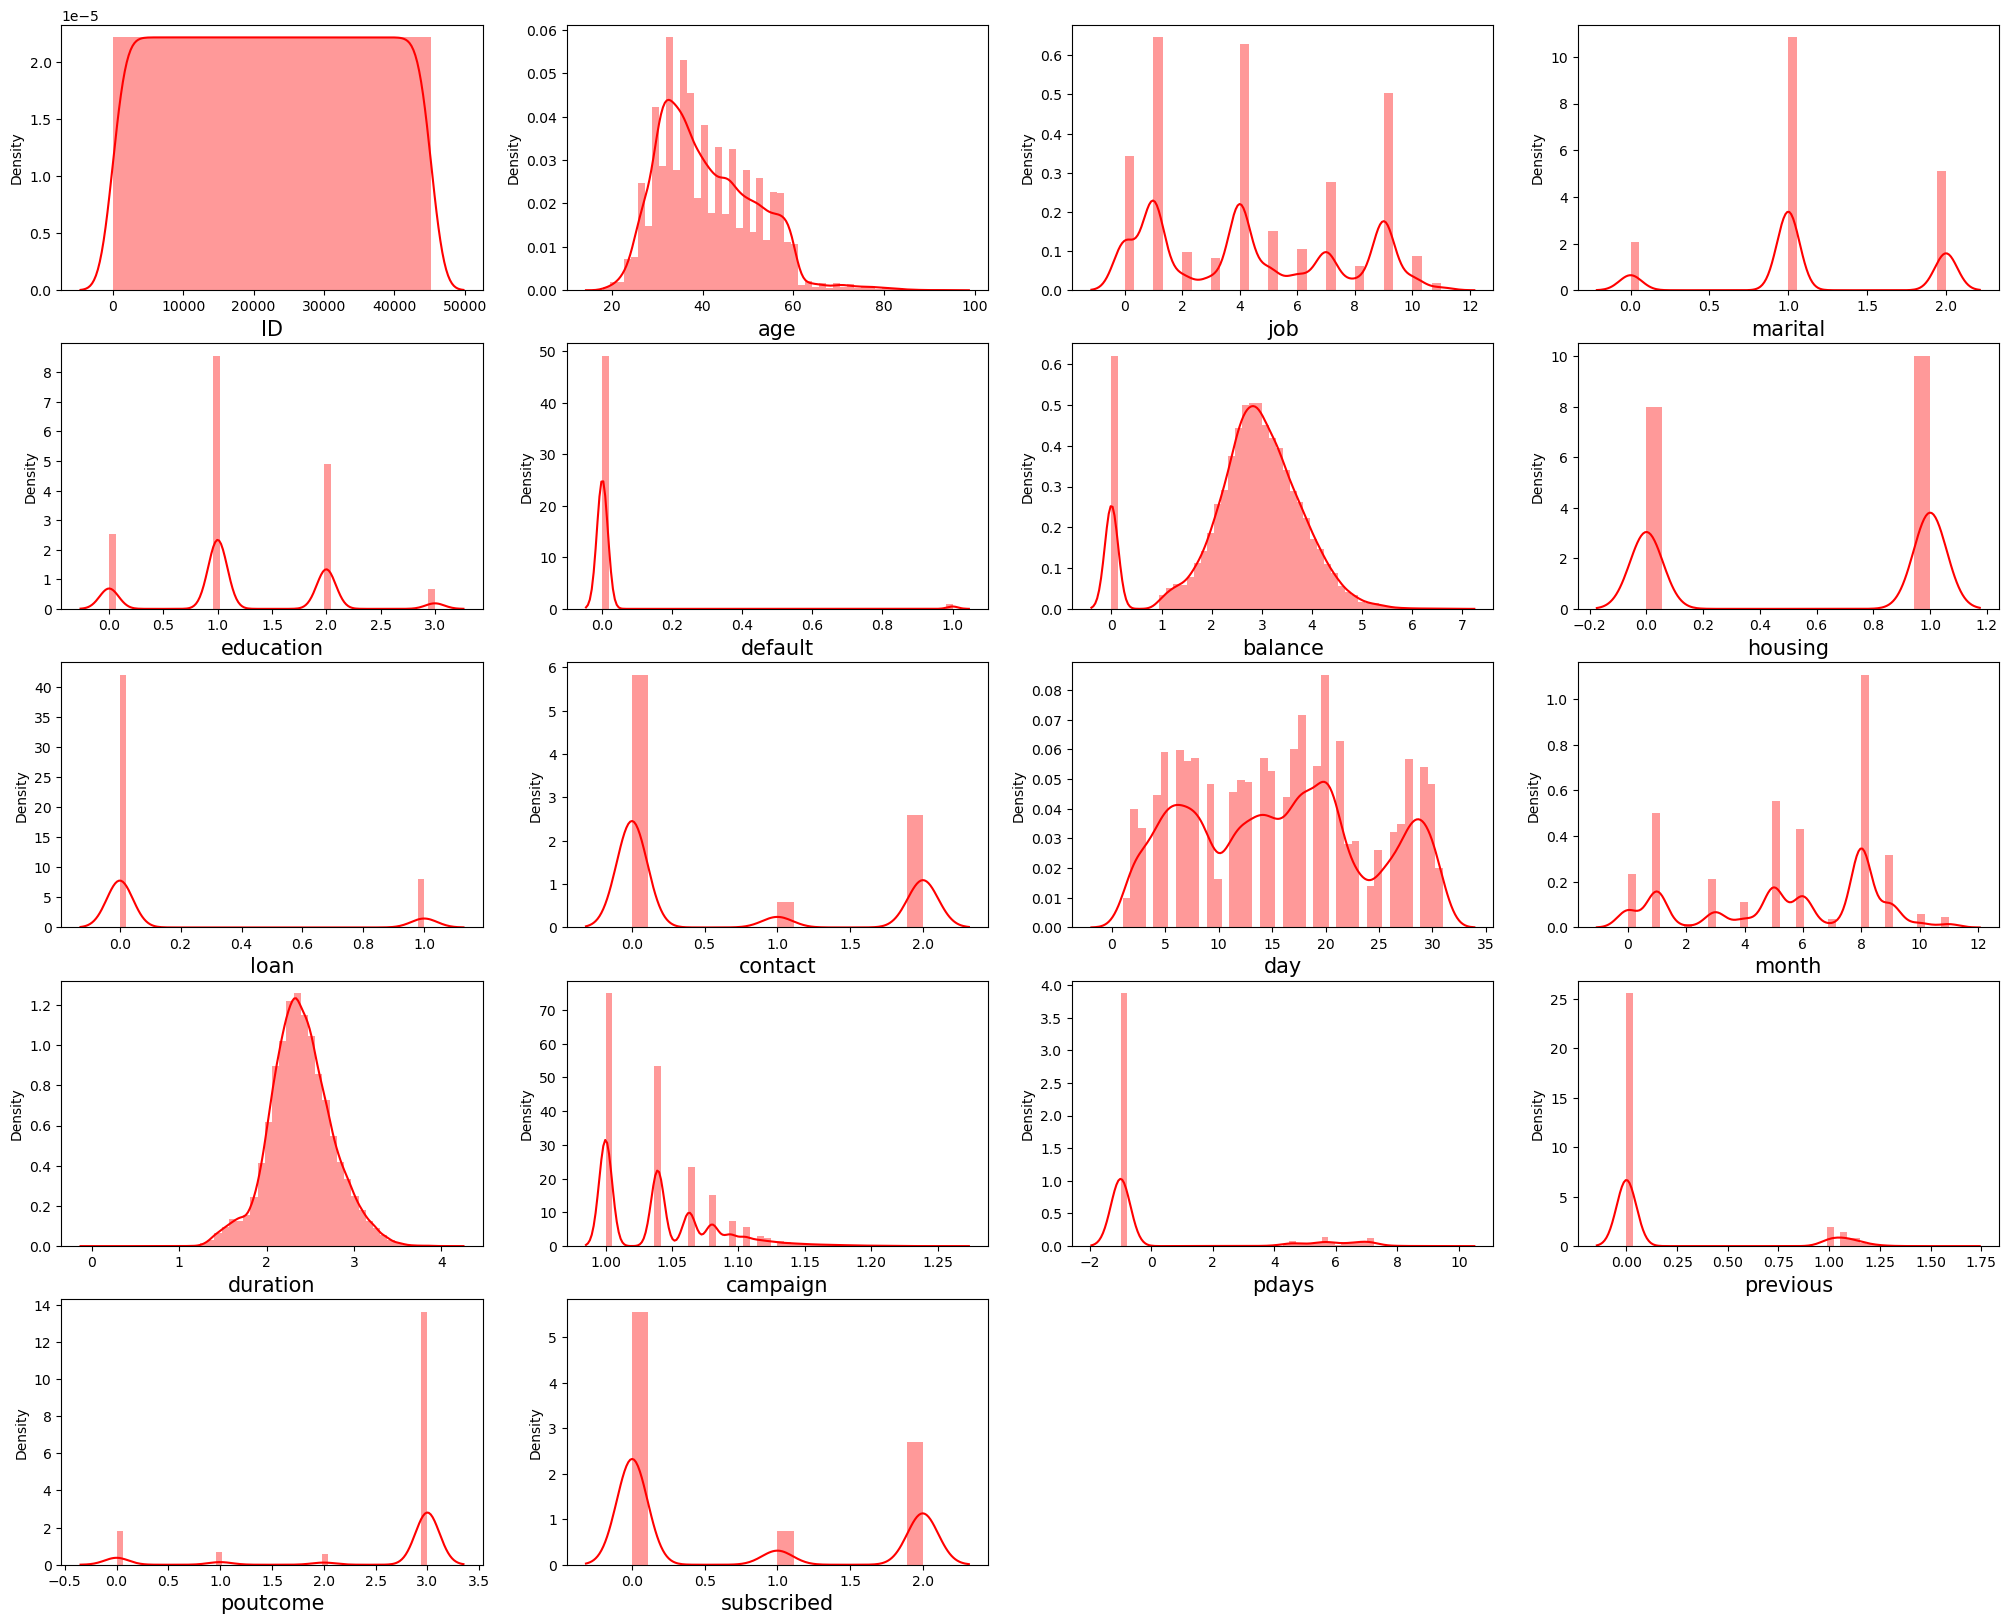

In [93]:
plt.figure(figsize=(25,20))
p=1
for i in outliers:
    if p<=18:
        ax=plt.subplot(5,4,p)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

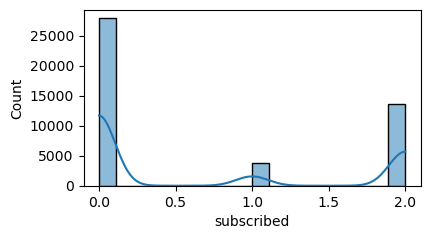

In [94]:
plt.figure(figsize=(20,16))
plt.subplot(6,4,3)
sns.histplot(df['subscribed'],kde=True)
plt.show()

In [95]:
df2_new.skew()

ID           -0.040245
age           0.451743
job           0.256397
marital      -0.103378
education     0.169678
default       0.000000
balance      -0.875236
housing      -0.186326
loan          2.017763
contact       0.812336
day           0.104555
month        -0.457675
duration      0.036302
campaign      0.757121
pdays         1.713195
previous      1.619233
poutcome     -1.935946
subscribed    0.657042
dtype: float64

In [96]:
df2_new['loan']=np.sqrt(df2_new['loan'])

In [97]:
df2_new['contact']=np.sqrt(df2_new['contact'])

In [98]:
df2_new.skew()

ID           -0.040245
age           0.451743
job           0.256397
marital      -0.103378
education     0.169678
default       0.000000
balance      -0.875236
housing      -0.186326
loan          2.017763
contact       0.719955
day           0.104555
month        -0.457675
duration      0.036302
campaign      0.757121
pdays         1.713195
previous      1.619233
poutcome     -1.935946
subscribed    0.657042
dtype: float64

<AxesSubplot:xlabel='subscribed', ylabel='Density'>

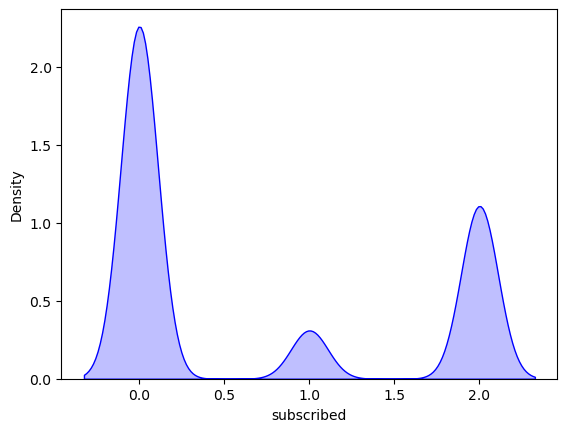

In [99]:
sns.distplot(df2_new['subscribed'],color='b',kde_kws={'shade':True},hist=False)

In [100]:
x=df2_new.iloc[:,0:-1]
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,3,0.0,3.529436,0,0.0,1.000000,19,9,1.878922,1.039259,-1.000000,0.000000,3
1,40576,31,11,1,1,0.0,1.200937,0,0.0,0.000000,20,5,2.120835,1.039259,-1.000000,0.000000,3
2,15320,27,7,1,1,0.0,3.102032,1,0.0,0.000000,18,5,2.492883,1.000000,-1.000000,0.000000,3
3,43962,57,4,0,2,0.0,3.855967,0,0.0,0.000000,22,6,3.087947,1.000000,4.379519,1.095873,2
4,29842,31,9,1,1,0.0,2.217811,1,0.0,0.000000,4,3,2.691311,1.000000,-1.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0.0,1.885973,0,0.0,0.000000,28,1,2.299907,1.080060,-1.000000,0.000000,3
13560,11743,54,1,1,0,0.0,3.628169,1,0.0,1.414214,20,6,2.325106,1.000000,-1.000000,0.000000,3
13561,28292,35,5,1,0,0.0,2.565316,1,0.0,0.000000,29,4,2.267722,1.000000,-1.000000,0.000000,3
13562,45163,29,0,2,1,0.0,2.782401,0,0.0,0.000000,9,9,2.434131,1.039259,4.497941,1.095873,2


In [101]:
y=df2_new.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
13559    2
13560    2
13561    2
13562    2
13563    2
Name: subscribed, Length: 40126, dtype: int32

In [102]:
print(x.shape)
print(y.shape)

(40126, 17)
(40126,)


In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.245293,1.501632,-1.331915,-0.293699,2.355775,0.0,0.718039,-1.097489,-0.411637,0.842628,0.401250,1.155774,-1.451457,-0.002716,-0.472578,-0.479520,0.451641
1,1.355527,-0.956226,2.024630,-0.293699,-0.320248,0.0,-1.386329,-1.097489,-0.411637,-0.714588,0.522148,-0.159342,-0.768664,-0.002716,-0.472578,-0.479520,0.451641
2,-0.582816,-1.349484,0.804068,-0.293699,-0.320248,0.0,0.331775,0.911171,-0.411637,-0.714588,0.280352,-0.159342,0.281430,-1.000425,-0.472578,-0.479520,0.451641
3,1.615395,1.599947,-0.111354,-1.947267,1.017764,0.0,1.013140,-1.097489,-0.411637,-0.714588,0.763944,0.169437,1.960983,-1.000425,1.514042,2.130496,-0.550768
4,0.531716,-0.956226,1.414349,-0.293699,-0.320248,0.0,-0.467335,0.911171,-0.411637,-0.714588,-1.412217,-0.816901,0.841489,-1.000425,-0.472578,-0.479520,0.451641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40121,0.042295,-0.169711,-0.111354,-0.293699,1.017764,0.0,-0.767232,-1.097489,-0.411637,-0.714588,1.489331,-1.474459,-0.263239,1.034161,-0.472578,-0.479520,0.451641
40122,-0.857343,1.305004,-1.026775,-0.293699,-1.658259,0.0,0.807269,0.911171,-0.411637,1.487648,0.522148,0.169437,-0.192114,-1.000425,-0.472578,-0.479520,0.451641
40123,0.412757,-0.562969,0.193787,-0.293699,-1.658259,0.0,-0.153279,0.911171,-0.411637,-0.714588,1.610229,-0.488121,-0.354080,-1.000425,-0.472578,-0.479520,0.451641
40124,1.707569,-1.152855,-1.331915,1.359868,-0.320248,0.0,0.042910,-1.097489,-0.411637,-0.714588,-0.807728,1.155774,0.115604,-0.002716,1.557774,2.130496,-0.550768


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,2.651681,ID
1,1.275824,age
2,1.049445,job
3,1.237330,marital
4,1.067119,education
5,NaN,default
6,1.027667,balance
7,1.209372,housing
8,1.023934,loan
9,2.346040,contact


In [105]:
df['subscribed'].nunique()

3

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [108]:
x_train=np.abs(x_train)
x_train.shape

(28088, 17)

In [109]:
x_test.shape

(12038, 17)

In [110]:
df2_new=np.abs(x_test)

In [111]:
x_test.shape

(12038, 17)

In [112]:
y_train.shape

(28088,)

In [113]:
y_test.shape

(12038,)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtr=DecisionTreeClassifier()

In [116]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
pred=dtr.predict(x_test)
pred

array([0, 0, 0, ..., 2, 0, 0])

In [118]:
print(accuracy_score(y_test,pred))

0.4790662900814089


In [119]:
print(confusion_matrix(y_test,pred))

[[4067  375 2880]
 [ 445  264  334]
 [1986  251 1436]]


In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      7322
           1       0.30      0.25      0.27      1043
           2       0.31      0.39      0.35      3673

    accuracy                           0.48     12038
   macro avg       0.41      0.40      0.40     12038
weighted avg       0.50      0.48      0.49     12038



In [121]:
def pred_dtr(p):
    p=p.reshape(1,-1)
    pred=dtr.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [122]:
p=np.array([0.775157,2.634382,0.197741,-0.343527,-1.800454,0.0,0.739836,-1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_dtr(p)


Response type [1]
not sure about subscription


In [123]:
from sklearn. svm import SVC

In [124]:
svc= SVC()

In [125]:
svc.fit(x_train,y_train)

SVC()

In [126]:
pred=svc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
print(accuracy_score(y_test,pred))

0.6086559229107825


In [128]:
print(confusion_matrix(y_test,pred))

[[7318    4    0]
 [1034    7    2]
 [3664    7    2]]


In [129]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      7322
           1       0.39      0.01      0.01      1043
           2       0.50      0.00      0.00      3673

    accuracy                           0.61     12038
   macro avg       0.50      0.34      0.26     12038
weighted avg       0.56      0.61      0.46     12038



In [130]:
def pred_svc(p):
    p=p.reshape(1,-1)
    pred=svc.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [131]:
p=np.array([6.775157,9.634382,0.197741,1.343527,1.800454,3.0,0.739836,1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_svc(p)

Response type [0]
not subscribed


In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
gnb=GaussianNB()

In [134]:
gnb.fit(x_train,y_train)

GaussianNB()

In [135]:
pred=gnb.predict(x_test)
pred

array([0, 0, 2, ..., 2, 2, 2])

In [136]:
print(accuracy_score(y_test,pred))

0.45098853630171126


In [137]:
print(confusion_matrix(y_test,pred))

[[3299   39 3984]
 [ 268    4  771]
 [1531   16 2126]]


In [138]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      7322
           1       0.07      0.00      0.01      1043
           2       0.31      0.58      0.40      3673

    accuracy                           0.45     12038
   macro avg       0.34      0.34      0.31     12038
weighted avg       0.49      0.45      0.45     12038



In [139]:
def pred_gnb(p):
    p=p.reshape(1,-1)
    pred=gnb.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [140]:
p=np.array([6.775157,9.634382,0.197741,1.343527,1.800454,3.0,0.739836,1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_gnb(p)

Response type [1]
not sure about subscription


In [141]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [142]:
lg.fit(x_train,y_train)

LogisticRegression()

In [143]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [144]:
print(accuracy_score(y_test,pred))

0.5301545107160658


In [145]:
print(confusion_matrix(y_test,pred))

[[6117 1189   16]
 [ 784  258    1]
 [3007  659    7]]


In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71      7322
           1       0.12      0.25      0.16      1043
           2       0.29      0.00      0.00      3673

    accuracy                           0.53     12038
   macro avg       0.34      0.36      0.29     12038
weighted avg       0.48      0.53      0.45     12038



In [147]:
def pred_lg(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [148]:
p=np.array([0.775157,2.634382,0.197741,-0.343527,-1.800454,0.0,0.739836,-1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_lg(p)


Response type [0]
not subscribed


In [149]:
from sklearn.naive_bayes import MultinomialNB

In [150]:
mnb=MultinomialNB()

In [151]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [152]:
pred=mnb.predict(x_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [153]:
print(accuracy_score(y_test,pred))

0.606080744309686


In [154]:
print(confusion_matrix(y_test,pred))

[[7192  130    0]
 [ 939  104    0]
 [3574   99    0]]


In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.98      0.76      7322
           1       0.31      0.10      0.15      1043
           2       0.00      0.00      0.00      3673

    accuracy                           0.61     12038
   macro avg       0.31      0.36      0.30     12038
weighted avg       0.40      0.61      0.47     12038



In [156]:
def pred_mnb(p):
    p=p.reshape(1,-1)
    pred=mnb.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [157]:
p=np.array([0.775157,2.634382,0.197741,-0.343527,-1.800454,0.0,0.739836,-1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_mnb(p)


Response type [0]
not subscribed


In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knn=KNeighborsClassifier()

In [160]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [161]:
pred=knn.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
print(accuracy_score(y_test,pred))

0.5502575178601097


In [163]:
print(confusion_matrix(y_test,pred))

[[5920  376 1026]
 [ 649  197  197]
 [2903  263  507]]


In [164]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.71      7322
           1       0.24      0.19      0.21      1043
           2       0.29      0.14      0.19      3673

    accuracy                           0.55     12038
   macro avg       0.38      0.38      0.37     12038
weighted avg       0.49      0.55      0.50     12038



In [165]:
def pred_knn(p):
    p=p.reshape(1,-1)
    pred=knn.predict(p)
    print('Response type',pred)
    if(pred==0):
        print('not subscribed')
    if(pred==1):
        print('not sure about subscription')
    elif(pred==2):
        print('subscribed')

In [166]:
p=np.array([0.775157,2.634382,0.197741,-0.343527,-1.800454,0.0,0.739836,-1.274125,-0.382807,-0.290164,-0.039608,-1.341346,-0.847413,0.968469,-0.834413,-1.064624,-0.759529])
pred_knn(p)


Response type [0]
not subscribed


From the above model performance of DecisionTreeClassifier,SVC, GaussianNB, Logistic regression and MultinomialNB, we can confirm the best fitted and best performing model is MultinomialNB. As, the MultinomialNB model is giving 61% accuracy.

In [170]:
import joblib
joblib.dump(mnb,'Bank_Marketing_MNB.obj')

['Bank_Marketing_MNB.obj']

In [171]:
model=joblib.load('Bank_Marketing_MNB.obj')
model

MultinomialNB()